# <span style="color:orange">K-Fold Cross Validation</span>

### <span style="color:orange">Importing the Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### <span style="color:orange">Importing the Dataset</span>

In [2]:
dataset = pd.read_csv("Datasets\\Social_Network_Ads.csv")

input_features = dataset.iloc[ : , :-1].values
dv = dataset.iloc[ : , -1].values

In [3]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### <span style="color:orange">Splitting the dataset into Training set and Test set</span>

In [4]:
from sklearn.model_selection import train_test_split

input_features_train, input_features_test, dv_train, dv_test = train_test_split(input_features,
                                                                                dv,
                                                                                test_size=0.2,
                                                                                random_state=0)

### <span style="color:orange">Feature Scaling</span>

In [5]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
input_features_train = standard_scaler.fit_transform(input_features_train)
input_features_test = standard_scaler.transform(input_features_test)

### <span style="color:orange">Training the SVM kernel Model on the Training Set</span>

In [6]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf', random_state=0)
svc_rbf.fit(X=input_features_train, y=dv_train)

SVC(random_state=0)

### <span style="color:orange">Predicting the Test Set Results</span>

In [7]:
dv_predicted = svc_rbf.predict(X=input_features_test)

### <span style="color:orange">Making the Confusion Matrix</span>

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(dv_test, dv_predicted)
print(f"accuracy score = {accuracy_score(dv_test, dv_predicted) * 100}%")
print("Confusion Matrix: ", cm)

accuracy score = 95.0%
Confusion Matrix:  [[55  3]
 [ 1 21]]


### <span style="color:orange">Applying the K-Fold Cross Validation
</span>

In [9]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=svc_rbf, X=input_features_train, y=dv_train, cv=10) * 100

accuracies_average = accuracies.mean()

accuracies_standard_deviation = accuracies.std()

In [10]:
accuracies

array([ 84.375,  87.5  ,  90.625,  84.375,  93.75 ,  84.375,  90.625,
        90.625, 100.   ,  93.75 ])

In [11]:
print(accuracies)

[ 84.375  87.5    90.625  84.375  93.75   84.375  90.625  90.625 100.
  93.75 ]


In [12]:
print(accuracies_average)

90.0


In [13]:
print(accuracies_standard_deviation)

4.80071609241788


### <span style="color:orange">Visualizing the Training Set Results</span>

C:\Users\hp\AppData\Local\Temp\ipykernel_22128\3514258755.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


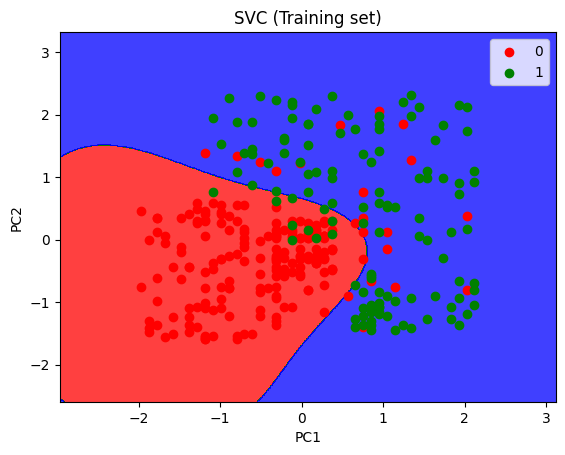

In [14]:
from matplotlib.colors import ListedColormap

X_set, y_set = input_features_train, dv_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svc_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### <span style="color:orange">Visualizing the Test Set Results</span>

C:\Users\hp\AppData\Local\Temp\ipykernel_22128\3207199718.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


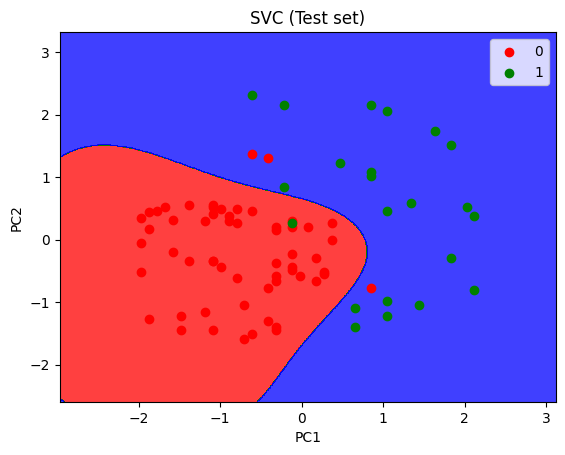

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = input_features_test, dv_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svc_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

___